In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from scipy import stats
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [2]:
df1 = pd.read_csv('../csv/keisuke1.csv',header=0)
df2 = pd.read_csv('../csv/keisuke2.csv',header=0)
df3 = pd.read_csv('../csv/keisuke3.csv',header=0)
df4 = pd.read_csv('../csv/keisuke4.csv',header=0)

In [3]:
df1 = df1.drop(df1[df1.STATE==1].index)
df2 = df2.drop(df2[df2.STATE==1].index)
df3 = df3.drop(df3[df3.STATE==1].index)
df4 = df4.drop(df4[df4.STATE==1].index)

In [4]:
df1.head()

,SEC,GSR,STATE
60,60,384,2
61,61,389,2
62,62,395,2
63,63,384,2
64,64,366,2


In [5]:
def create_data(X,Y):
    time_step=10;
    Xs = []
    Ys = []
#     Ys = np.zeros((X.size-time_step,2))
    for i in range(0,X.size-time_step,1):
        tmp = X.iloc[i:(i+time_step)]
        labels = Y.iloc[i:(i+time_step)]
        Xs.append(tmp)
        Ys.append((stats.mode(labels)[0][0])-2)
#         if stats.mode(labels)[0][0] == 2:
#             Ys[i][0] = 1
#         else:
#             Ys[i][1] = 1
        
    return np.array(Xs),np.array(Ys).reshape(-1,1)

In [6]:
#TRAIN
X_train,Y_train= create_data(df1['GSR'],df1['STATE'])
tmp1, tmp2 = create_data(df2['GSR'],df2['STATE'])
X_train = np.concatenate((X_train,tmp1),axis=0)
Y_train = np.concatenate((Y_train,tmp2),axis=0)
tmp1, tmp2 = create_data(df3['GSR'],df3['STATE'])
X_train = np.concatenate((X_train,tmp1),axis=0)
Y_train = np.concatenate((Y_train,tmp2),axis=0)

X_train = np.reshape(X_train,[X_train.shape[0],X_train.shape[1],1])
#Y_train = np.reshape(Y_train,[1,Y_train.shape[0],Y_train.shape[1]])

In [7]:
#TEST
X_test, Y_test = create_data(df4['GSR'],df4['STATE'])
X_test = np.reshape(X_test,[X_test.shape[0],X_test.shape[1],1])
#Y_test = np.reshape(Y_test,[1,Y_test.shape[0],Y_test.shape[1]])

In [8]:
print(X_train.shape,Y_train.shape)

(1050, 10, 1) (1050, 1)


In [9]:
X_train

array([[[384],
        [389],
        [395],
        ...,
        [346],
        [347],
        [349]],

       [[389],
        [395],
        [384],
        ...,
        [347],
        [349],
        [356]],

       [[395],
        [384],
        [366],
        ...,
        [349],
        [356],
        [361]],

       ...,

       [[325],
        [320],
        [317],
        ...,
        [327],
        [324],
        [319]],

       [[320],
        [317],
        [317],
        ...,
        [324],
        [319],
        [316]],

       [[317],
        [317],
        [317],
        ...,
        [319],
        [316],
        [313]]])

In [10]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [11]:
model = keras.Sequential()

In [12]:
model.add(keras.layers.LSTM(16, return_sequences=True, input_shape=(10,1)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['acc'])

In [13]:
history = model.fit(X_train,
                   Y_train,
                   epochs=32,
                    batch_size=16,
                    validation_split=0.2,
                   shuffle=False)

Epoch 1/32
53/53 [==============================] - 3s 10ms/step - loss: 0.7186 - acc: 0.3170 - val_loss: 0.6641 - val_acc: 0.8286
Epoch 2/32
53/53 [==============================] - 0s 2ms/step - loss: 0.7111 - acc: 0.3110 - val_loss: 0.6738 - val_acc: 0.7629
Epoch 3/32
53/53 [==============================] - 0s 2ms/step - loss: 0.7049 - acc: 0.3536 - val_loss: 0.6830 - val_acc: 0.7629
Epoch 4/32
53/53 [==============================] - 0s 3ms/step - loss: 0.6994 - acc: 0.3487 - val_loss: 0.6919 - val_acc: 0.7629
Epoch 5/32
53/53 [==============================] - 0s 3ms/step - loss: 0.6944 - acc: 0.3585 - val_loss: 0.7002 - val_acc: 0.1714
Epoch 6/32
53/53 [==============================] - 0s 3ms/step - loss: 0.6899 - acc: 0.6830 - val_loss: 0.7082 - val_acc: 0.1714
Epoch 7/32
53/53 [==============================] - 0s 3ms/step - loss: 0.6859 - acc: 0.6830 - val_loss: 0.7157 - val_acc: 0.1714
Epoch 8/32
53/53 [==============================] - 0s 3ms/step - loss: 0.6822 - acc: 0.6

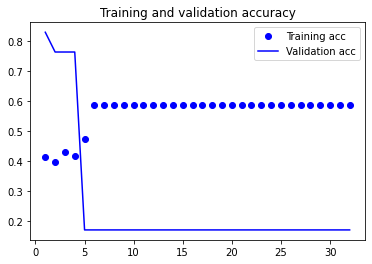

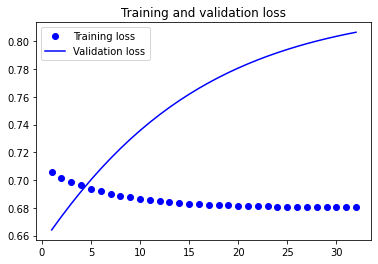

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model.evaluate(X_test,Y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.7042 - acc: 0.5029


[0.7041531205177307, 0.5028571486473083]